Binning and Binarization

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("D:\Personal\Learnings\Machine Learning\Machine Learning Algorithms\Machine-Learning-Projects\Day4_Titanic Dataset\Titanic-Dataset.csv", usecols= ['Age', 'Fare', 'Survived'])

In [4]:
df.sample(3)

,Survived,Age,Fare
24,0,8.0,21.075
260,0,NaN,7.750
718,0,NaN,15.500


In [10]:
df.shape

(714, 3)

In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
df.shape

(714, 3)

In [12]:
# Train Test Split
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [14]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [15]:
clf= DecisionTreeClassifier()

In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [20]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring='accuracy'))

np.float64(0.6303012519561816)

Using Discretizer

In [21]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [22]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [23]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [24]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [25]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [26]:
X_train_trf

array([[ 8.,  8.],
       [ 6.,  7.],
       [ 8.,  7.],
       ...,
       [11., 14.],
       [ 9.,  8.],
       [ 9.,  3.]], shape=(571, 2))

In [27]:
# This numpy array must be converted into pandas Dataframe soo
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [28]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [30]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
315,26.0,6.0,7.8542,2.0,"(25.0, 28.0]","(7.775, 7.896]"
456,65.0,14.0,26.5500,10.0,"(54.0, 80.0]","(26.0, 26.55]"
319,40.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
807,18.0,2.0,7.7750,2.0,"(16.0, 19.0]","(7.25, 7.775]"
380,42.0,12.0,227.5250,14.0,"(38.0, 42.0]","(108.9, 512.329]"


In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [32]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [33]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.6275039123630672)

In [38]:
def discretize(bins, strategy):
    kbin_age= KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_age= KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:, 0], color= 'red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6317097026604068


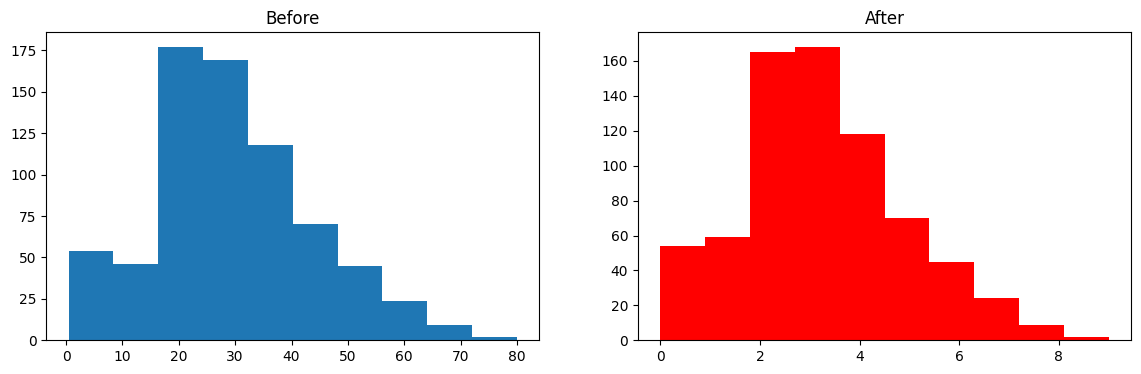

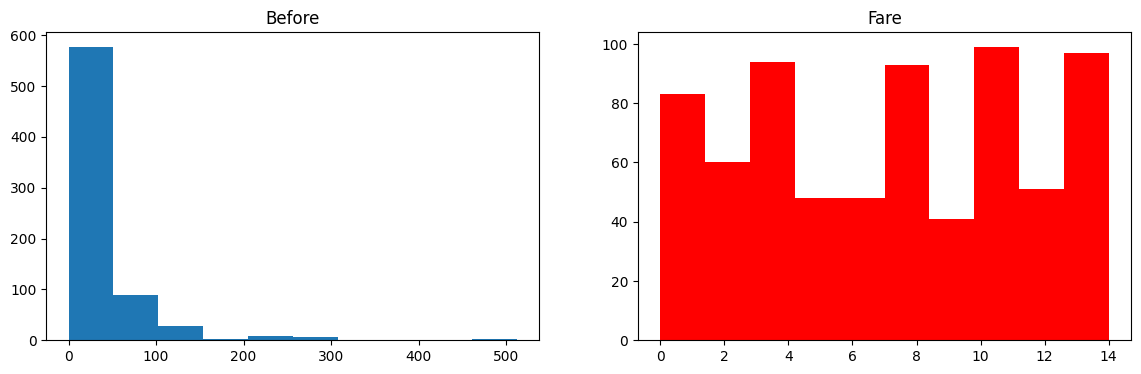

In [39]:
discretize(10, 'kmeans')

0.6303012519561815


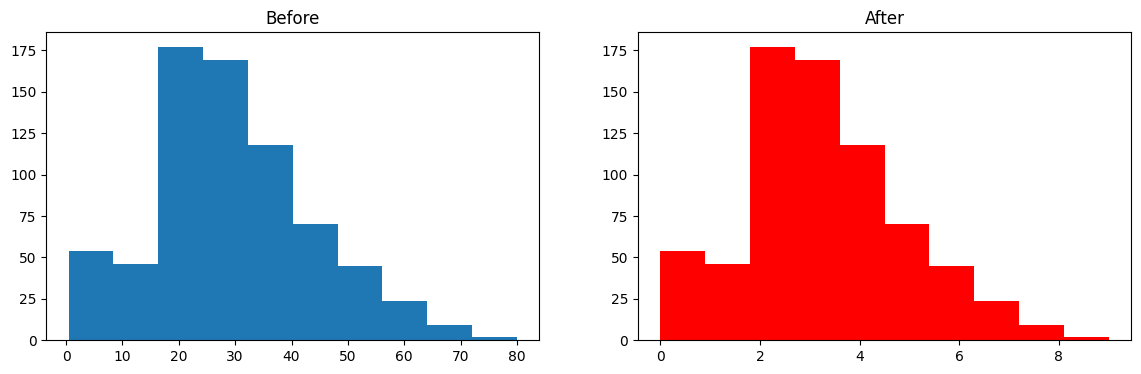

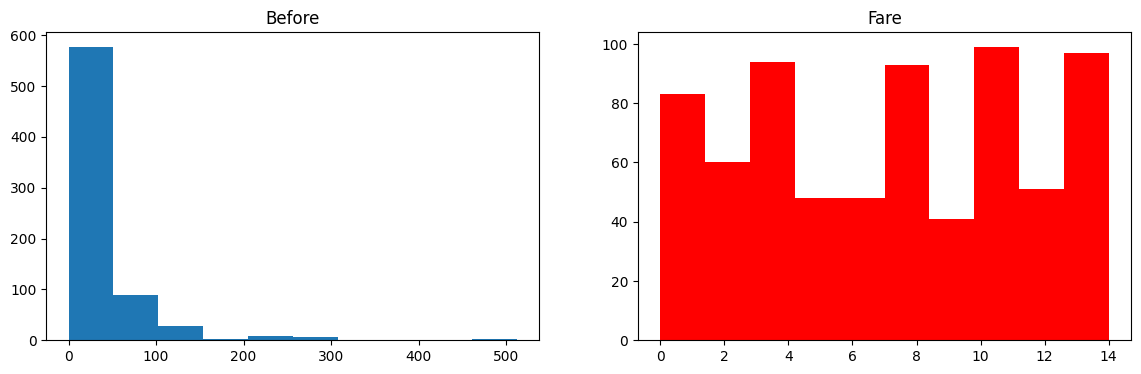

In [40]:
discretize(10, 'uniform')

0.6289319248826291


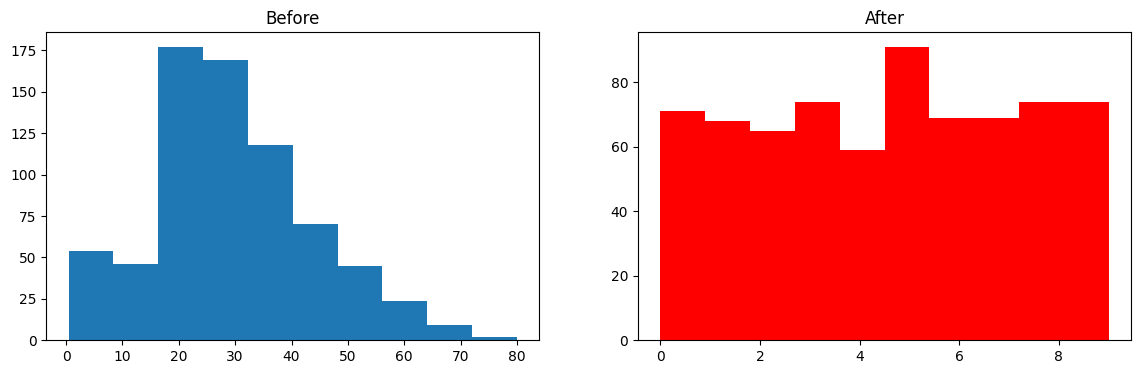

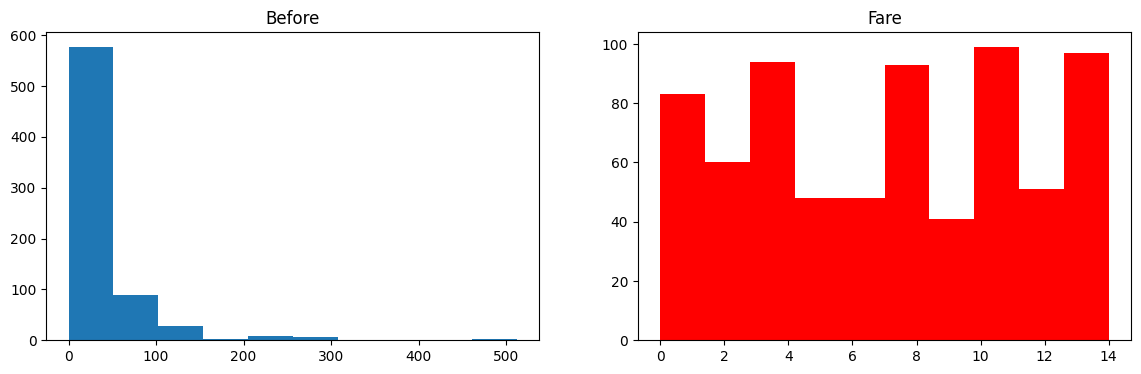

In [41]:
discretize(10, 'quantile')

Pickling the model

['model.pkl']